In [2]:
import pandas as pd
import pandas.io.sql as sqlio
import numpy as np
import pymongo
import requests

In [3]:
res = requests.get("https://data.gov.ie/dataset/827b9a67-8a1c-481a-ab14-bf3ff70d645b/resource/11dc0e61-4bf9-4781-a6c4-cd9f725a5674/download/fishers_cattle.json")

In [4]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")

mydb = myclient["DAP_Akinwale"]
mycol = mydb["cattle"]

In [5]:
many_ids = mycol.insert_many(res.json()).inserted_ids

In [6]:
dff=[]
for i in mycol.find():
    dff.append(i)
    
df = pd.DataFrame(dff)

In [7]:
df.head()

,_id,YEAR,LOCATION,CATTLE_BREED_TYPE,CATTLE_GENDER,CATTLE_AGE_0_6,CATTLE_AGE_6_6,CATTLE_AGE_6_12,CATTLE_AGE_12_18,CATTLE_AGE_18_24,CATTLE_AGE_24_30,CATTLE_AGE_30_36,CATTLE_AGE_36_PLUS
0,61cc73318344f513d0d8f017,2014,Boyne,BEEF,C,0,0,0,3,199,504,3929,57144
1,61cc73318344f513d0d8f018,2020,Doonbeg,BEEF,C,0,0,0,0,11,41,312,5863
2,61cc73318344f513d0d8f019,2019,Ilen,BEEF,C,0,0,0,0,12,78,473,6794
3,61cc73318344f513d0d8f01a,2019,Boyne,BEEF,F,1477,7816,33166,9312,35995,7049,7915,1680
4,61cc73318344f513d0d8f01b,2014,Boyne,BEEF,F,1490,8008,33775,9525,36253,7203,8138,1764


In [9]:
# Getting the total number of cells in the data
no_of_cells = np.product(df.shape)
print(no_of_cells)

45539


In [11]:
# Getting the number of missing values per column
Null_values = df.isnull().sum()
print(Null_values)

_id                   0
YEAR                  0
LOCATION              0
CATTLE_BREED_TYPE     0
CATTLE_GENDER         0
CATTLE_AGE_0_6        0
CATTLE_AGE_6_6        0
CATTLE_AGE_6_12       0
CATTLE_AGE_12_18      0
CATTLE_AGE_18_24      0
CATTLE_AGE_24_30      0
CATTLE_AGE_30_36      0
CATTLE_AGE_36_PLUS    0
dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 3503 non-null   object
 1   YEAR                3503 non-null   int64 
 2   LOCATION            3503 non-null   object
 3   CATTLE_BREED_TYPE   3503 non-null   object
 4   CATTLE_GENDER       3503 non-null   object
 5   CATTLE_AGE_0_6      3503 non-null   int64 
 6   CATTLE_AGE_6_6      3503 non-null   int64 
 7   CATTLE_AGE_6_12     3503 non-null   int64 
 8   CATTLE_AGE_12_18    3503 non-null   int64 
 9   CATTLE_AGE_18_24    3503 non-null   int64 
 10  CATTLE_AGE_24_30    3503 non-null   int64 
 11  CATTLE_AGE_30_36    3503 non-null   int64 
 12  CATTLE_AGE_36_PLUS  3503 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 355.9+ KB


In [13]:
df.dtypes

_id                   object
YEAR                   int64
LOCATION              object
CATTLE_BREED_TYPE     object
CATTLE_GENDER         object
CATTLE_AGE_0_6         int64
CATTLE_AGE_6_6         int64
CATTLE_AGE_6_12        int64
CATTLE_AGE_12_18       int64
CATTLE_AGE_18_24       int64
CATTLE_AGE_24_30       int64
CATTLE_AGE_30_36       int64
CATTLE_AGE_36_PLUS     int64
dtype: object

In [15]:
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import plotly.graph_objects as go
import seaborn as sns

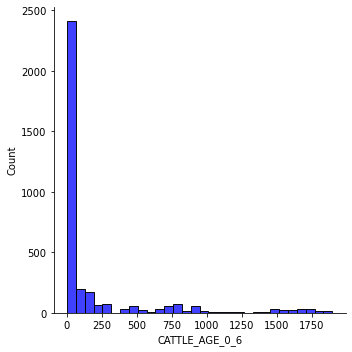

In [23]:
# Making a distribution of cattles aged between 0 to 6 weeks. 
sns.displot(df['CATTLE_AGE_0_6'],bins=30,kde=False,color='blue')

<AxesSubplot:xlabel='CATTLE_GENDER', ylabel='count'>

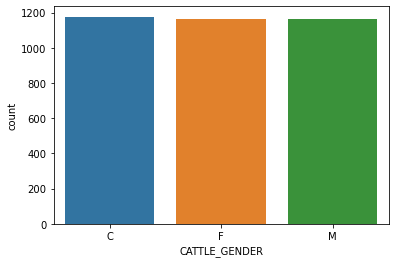

In [24]:
# Showing how the cattle gender is distributed. 
sns.countplot(x='CATTLE_GENDER',data=df)

In [26]:
!pip install psycopg2
import psycopg2

In [ ]:
import psycopg2
try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "#Walesunday2021",
        host = "localhost",
        port = "5432",
        database = "postgres")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute('CREATE DATABASE weather;')
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if dbConnection in locals(): 
        dbConnection.close()